<a href="https://colab.research.google.com/github/Art9050/Test_Work/blob/main/kart_%22%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B4%D0%BB%D1%8F_%D0%BA%D0%B0%D0%BD%D0%B4%D0%B8%D0%B4%D0%B0%D1%82%D0%BE%D0%B2_%D0%BD%D0%B0_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D1%83_SQL%22_%D0%A2%D0%B8%D0%BD%D1%8C%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ВАЖНО!** Чтобы ваше решение сохранялось и вы могли его нам предоставить в качестве ответа, сохраните себе копию ноутбука (_Файл_ -> _Сохранить копию на Диск_).

Затем разрешите доступ к ноутбуку по ссылке (_Поделиться_ -> _Все у кого есть ссылка_)



Прежде чем перейти к написанию запросов SQL, необходимо отработать параграф "Загрузка и подключение к базе данных"


Сделать это можно нажав на кнопку
 image.png в левом верхнем углу ячейки, вы ее увидите если наведете мышь на соответствующую ячейку, либо воспользоваться комбинацией клавиш `Ctrl+Enter` или `Shift+Enter`

 Так же нужно ознакомиться с параграфом "Инструкция"  

 Теперь вы готовы писать запрос!

## Загрузка и подключение к базе данных

In [ ]:
import gdown

!gdown 'https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0'

Downloading...
From: https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0
To: /content/data.db
100% 16.0M/16.0M [00:00<00:00, 59.9MB/s]


Изменил   
 %config SqlMagic.displaylimit = 10  
SQLAlchemy==2.0



In [ ]:
!pip install SQLAlchemy==2.0
%load_ext sql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.20
    Uninstalling SQLAlchemy-2.0.20:
      Successfully uninstalled SQLAlchemy-2.0.20


In [ ]:
%sql sqlite:////content/data.db

# %config SqlMagic.displaylimit = 50
%config SqlMagic.displaylimit = 10


## Инструкция

Чтобы писать запросы к базе, нужно перед телом запроса указать команду

`%sql` -- для однострочных запросов, например:

`%sql select count(*) from table_name`

Или же `%%sql` для многострочных запросов:
```
%%sql
select
  count(*)
from
  table_1 as a
  join table_2 as b on
    a.col_1 = b.col_b
```

Также результат запроса можно сохранить в переменную:

`%sql create table qwerty as select * from queue`

А для многострочных запросов, поспользоваться оператором `<<`:
```
%%sql row_count <<
select
  count(*)
from
  table_1 as a
  join table_2 as b on
    a.col_1 = b.col_b
```
Далее можно обращаться к созданной переменной в других ячейках.


---


Ещё имеется возможность преобразовать результат запроса в `pandas.DataFrame`:

```
result = %sql SELECT * FROM character WHERE speechcount > 25
dataframe = result.DataFrame()
```

Либо конвертировать результирующую таблицу в CSV формат, скачать её и использовать, для дальнейшей обработки (анализ, визуализация, построение дашбордов):

```
result = %sql select * from sqlite_master;
result.csv(filename='tables.csv');
```
Файл появится в меню "Файл" слева от рабочей области ноутбука.
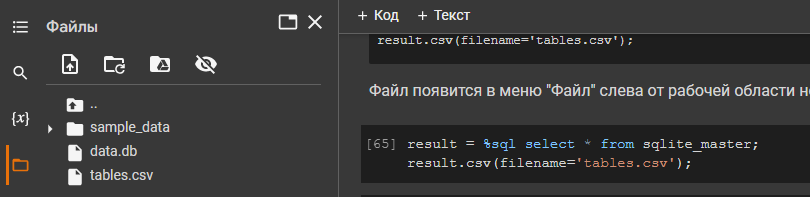

Можно вывести список имеющихся таблиц в базе:

In [ ]:
%sql select tbl_name, "sql" from sqlite_master;

 * sqlite:////content/data.db
Done.


tbl_name,sql
mngmnt,"CREATE TABLE mngmnt ( org_management_rk BIGINT, management_nm TEXT)"
product,"CREATE TABLE product ( hit_rk BIGINT, hid BIGINT, using_flg FLOAT)"
queue,"CREATE TABLE queue ( queue_id BIGINT, queue_desc TEXT)"
result,"CREATE TABLE result ( hit_status_result_id BIGINT, hit_status_result_desc TEXT)"
horoscope,"CREATE TABLE horoscope ( agent_login TEXT, horoscope TEXT)"
group,"CREATE TABLE ""group"" ( org_group_rk BIGINT, org_management_rk BIGINT, group_nm TEXT)"
emp_x_org_gr,"CREATE TABLE emp_x_org_gr ( employee_rk BIGINT, org_group_rk BIGINT)"
task,"CREATE TABLE task ( task_rk BIGINT, task_stage_id FLOAT, source_system_cd TEXT, create_dttm TEXT, finish_dttm TEXT)"
action,"CREATE TABLE action ( hit_rk BIGINT, hit_status_result_id BIGINT)"
call,"CREATE TABLE call ( wo_hit_rk BIGINT, wo_task_rk BIGINT, wo_queue_id BIGINT, agent_login TEXT, wo_employee_rk BIGINT, finish_dttm TEXT, duratoin_sec TEXT)"


# Задание 1
Необходимо с помощью SQL запроса собрать одну общую таблицу из всех данных витрин, которая должна включать в себя все поля этих витрин.
В качестве ответа предоставить ссылку на вашу копию страницы, где можно увидеть написанный запрос и собранную таблицу. Ссылку вставьте в Word файл "Техническое задание" в соответствующее поле.


_(одна из таблиц называется `group`, её имя конфликтует с зарезервированными ключевым словом SQL, поэтому его нужно будет заключить в двойные кавычки `""`)_


## Решение

In [ ]:
%%sql
WITH all_table AS(
select
    --task
    task_rk,
    task_stage_id,
    source_system_cd,
    create_dttm,
    task.finish_dttm as task_finish_dttm,
    -- call
    wo_hit_rk,
    wo_task_rk,
    wo_queue_id,
    c.agent_login as call_agent_login,
    wo_employee_rk,
    c.finish_dttm as call_finish_dttm,
    duratoin_sec, --- опечатка в Описании
    --action
    a.hit_rk as a_hit_rk,
    a.hit_status_result_id,
    --product
    p.hit_rk as p_hit_rk,
    hid,
    using_flg,
    --emp_x_org_gr
    employee_rk,
    emp_x_org_gr.org_group_rk as emp_org_group_rk,
    --result
    result.hit_status_result_id as r_hit_status_result_id,
    hit_status_result_desc,
    --queue
    queue_id,
    queue_desc,
    --group as gr
    gr.org_group_rk,
    gr.org_management_rk  as gr_org_management_rk,
    group_nm,
    --mngmnt
    mngmnt.org_management_rk  as mng_org_management_rk,
    management_nm, ---
    --horoscope
    horoscope.agent_login  as horoscope_agent_login,
    horoscope
from task
left join call as c
    on task_rk = wo_task_rk
left join action as a
    on wo_hit_rk = a.hit_rk
left join product as p
    on a.hit_rk = p.hit_rk
left join emp_x_org_gr
    on wo_employee_rk = employee_rk
left join result
    on a.hit_status_result_id = result.hit_status_result_id
left join queue
    on wo_queue_id = queue_id
left join 'group' as gr
    on emp_x_org_gr.org_group_rk = gr.org_group_rk
left join mngmnt
    on gr.org_management_rk = mngmnt.org_management_rk
left join horoscope
    on c.agent_login = horoscope.agent_login
)

select * from all_table


 * sqlite:////content/data.db
Done.


task_rk,task_stage_id,source_system_cd,create_dttm,task_finish_dttm,wo_hit_rk,wo_task_rk,wo_queue_id,call_agent_login,wo_employee_rk,call_finish_dttm,duratoin_sec,a_hit_rk,hit_status_result_id,p_hit_rk,hid,using_flg,employee_rk,emp_org_group_rk,r_hit_status_result_id,hit_status_result_desc,queue_id,queue_desc,org_group_rk,gr_org_management_rk,group_nm,mng_org_management_rk,management_nm,horoscope_agent_login,horoscope
15431250,18.0,FW,2022-08-25 09:05:53,None,38818264,15431250,14819,movakaro,44861024,2022-08-25 16:13:02,0,38818264,5,38818264,4,None,44861024,2752,5,Недозвон,14819,Очередь 40,2752,1768,Группа 16,1768,Управление КЦ Сезам,movakaro,Дева
93508186,1.0,GI,2022-08-01 05:09:01,2022-08-02 13:35:02,75189482,93508186,14644,8306aava,95591109,2022-08-02 13:34:55,"19,46",75189482,1,75189482,4,None,95591109,2031,1,"Дозвон, Отказ",14644,Очередь 119,2031,674,Группа 23,674,Управление КЦ Страница,8306aava,Овен
357853,1.0,GI,2022-08-08 22:05:30,2022-08-08 22:07:32,93045223,357853,10405,8251nsma,96021109,2022-08-08 22:07:29,"80,75",93045223,1,93045223,3,None,96021109,3240,1,"Дозвон, Отказ",10405,Очередь 36,3240,1621,Группа 36,1621,Управление КЦ Чизан,8251nsma,Овен
95793266,1.0,GI,2022-08-04 10:42:46,2022-08-04 13:59:52,84718799,95793266,14941,9185avis,32681113,2022-08-04 13:59:51,"163,26",84718799,3,84718799,4,0.0,32681113,2814,3,"Дозвон, Успешно",14941,Очередь 25,2814,1780,Группа 2,1780,Управление КЦ Хирс,9185avis,Дева
5014541,1.0,GI,2022-08-14 19:16:43,2022-08-15 11:12:14,9870229,5014541,14703,tevapasa,79631117,2022-08-15 11:12:08,"28,31",9870229,1,9870229,4,None,79631117,2138,1,"Дозвон, Отказ",14703,Очередь 129,2138,1521,Группа 29,1521,Управление КЦ Дирим,tevapasa,Дева
88979016,1.0,GI,2022-07-26 02:30:46,2022-08-17 16:13:47,75488035,88979016,14644,nayaivza,43761004,2022-08-02 15:41:28,"186,38",75488035,2,75488035,4,None,43761004,3233,2,"Дозвон, Перезвонить",14644,Очередь 119,3233,687,Группа 18,687,Управление КЦ Верс,nayaivza,Телец
88979016,1.0,GI,2022-07-26 02:30:46,2022-08-17 16:13:47,78858102,88979016,14644,novaadtr,96391109,2022-08-03 10:49:20,"40,4",78858102,2,78858102,4,None,96391109,2097,2,"Дозвон, Перезвонить",14644,Очередь 119,2097,687,Группа 19,687,Управление КЦ Верс,novaadtr,Весы
19952848,1.0,GI,2022-08-31 10:03:58,2022-09-19 16:35:01,52573771,19952848,10236,1825egva,85571118,2022-08-31 12:06:19,"118,93",52573771,2,52573771,3,None,85571118,3240,2,"Дозвон, Перезвонить",10236,Очередь 20,3240,1621,Группа 36,1621,Управление КЦ Чизан,1825egva,Водолей
96182364,23.0,FW,2022-08-04 03:33:02,2022-08-04 06:23:21,82796932,96182364,13780,pyanekov,40958840,2022-08-04 06:23:21,"183,92",82796932,1,82796932,4,None,40958840,3244,1,"Дозвон, Отказ",13780,Очередь 64,3244,1621,Группа 30,1621,Управление КЦ Чизан,pyanekov,Весы
3805464,23.0,FW,2022-08-12 04:20:30,2022-08-23 11:24:32,24557882,3805464,14790,syanlfsa,29111072,2022-08-19 17:10:14,0,24557882,5,24557882,4,None,29111072,3240,5,Недозвон,14790,Очередь 23,3240,1621,Группа 36,1621,Управление КЦ Чизан,syanlfsa,Рыбы


## Сохранение таблички

In [ ]:
# Сохранение в переменную
%%sql result <<
WITH all_table AS(
    select
        --task
        task_rk,
        task_stage_id,
        source_system_cd,
        create_dttm,
        task.finish_dttm as task_finish_dttm,
        -- call
        wo_hit_rk,
        wo_task_rk,
        wo_queue_id,
        c.agent_login as call_agent_login,
        wo_employee_rk,
        c.finish_dttm as call_finish_dttm,
        duratoin_sec, --- опечатка в Описании
        --action
        a.hit_rk as a_hit_rk,
        a.hit_status_result_id,
        --product
        p.hit_rk as p_hit_rk,
        hid,
        using_flg,
        --emp_x_org_gr
        employee_rk,
        emp_x_org_gr.org_group_rk as emp_org_group_rk,
        --result
        result.hit_status_result_id as r_hit_status_result_id,
        hit_status_result_desc,
        --queue
        queue_id,
        queue_desc,
        --group as gr
        gr.org_group_rk,
        gr.org_management_rk  as gr_org_management_rk,
        group_nm,
        --mngmnt
        mngmnt.org_management_rk  as mng_org_management_rk,
        management_nm, ---
        --horoscope
        horoscope.agent_login  as horoscope_agent_login,
        horoscope
    from task
    left join call as c
        on task_rk = wo_task_rk
    left join action as a
        on wo_hit_rk = a.hit_rk
    left join product as p
        on a.hit_rk = p.hit_rk
    left join emp_x_org_gr
        on wo_employee_rk = employee_rk
    left join result
        on a.hit_status_result_id = result.hit_status_result_id
    left join queue
        on wo_queue_id = queue_id
    left join 'group' as gr
        on emp_x_org_gr.org_group_rk = gr.org_group_rk
    left join mngmnt
        on gr.org_management_rk = mngmnt.org_management_rk
    left join horoscope
        on c.agent_login = horoscope.agent_login
)

select * from all_table


 * sqlite:////content/data.db
Done.
Returning data to local variable result


In [ ]:
# Сохранение в файл
result.csv(filename='tables.csv');

In [ ]:
%%sql
/*
task 50000 row
call 89174 row
action 89174 row
product 89174 row
emp_x_org_gr 1962 row
result 7 row
queue 155 row
'group' 52 row
mngmnt 45 row
horoscope 1962 row
*/

# Задание 2
Необходимо посчитать следующие значения:

* Общее количество звонков со статусом «Дозвон, Успешно»;
* Продажная конверсия, по формуле:

  $$ Конверсия = \frac{N_{Дозвон, Успешно}}{N_{Дозвон, Успешно} + N_{Дозвон, Отказ}}$$
* Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»

Ответы необходимо вписать в соответствующую таблицу в фаиле "Техническое задание"


## Решение

In [ ]:
%%sql
SELECT
result_positive,
--result_negative,
--result_negative + result_positive,
ROUND(CAST(result_positive as float) / (CAST(result_positive as float) + CAST(result_negative as float)), 2) as conversion,
ROUND(avg_duratoin_sec, 2) as avg_duratoin_sec
from (
    SELECT
        (SELECT COUNT(hit_status_result_id) FILTER (WHERE hit_status_result_id = 3)) AS result_positive,
        (SELECT COUNT(hit_status_result_id) FILTER (WHERE hit_status_result_id = 1)) AS result_negative,
        (SELECT avg(duratoin_sec) FILTER (WHERE hit_status_result_id = 3)) AS avg_duratoin_sec
    from call
    left join action
    on wo_hit_rk = hit_rk
    )

 * sqlite:////content/data.db
Done.


result_positive,conversion,avg_duratoin_sec
3310,0.15,109.69
